In [301]:
import pandas as pd
import os
from datetime import datetime

SAMPLE_RATE = 4
HEADER_LINES = 2

PARTICIPANTE = 10

ATIVIDADE = 'AVD'
MARCHA = 'D'
SEQUENCIA = 2
SENSOR = 'TEMP'

print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv')
print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv')
print('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv')


Dataset/Participante 10/V10_AVD_D_2/TEMP.csv
Dataset/Participante 10/V10_AVD_D_2/tags.csv
Lifesenior/AVD_D_2/V10_AVD_D_2.csv


In [302]:
 #read file
 data = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv',index_col=False,header=None)
 data = data.rename(columns={0: 'temp'})
 init_time_measure = data.iloc[0,0]
 print(data)
 print(init_time_measure)

             temp
0    1.660937e+09
1    4.000000e+00
2    2.477000e+01
3    2.477000e+01
4    2.477000e+01
..            ...
133  2.483000e+01
134  2.483000e+01
135  2.483000e+01
136  2.483000e+01
137  2.483000e+01

[138 rows x 1 columns]
1660937081.0


In [303]:
#read tags that inform init and end of activity
tags = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv',index_col=False,header=None)
print(tags)
print(tags.shape)

              0
0  1.660937e+09
1  1.660937e+09
(2, 1)


In [304]:
#store init and end activity time
init_activ_time = tags.iloc[0,0]
end_activ_time = tags.iloc[1,0]
print(init_activ_time)

1660937089.23


In [305]:
#calc time to cut in file init
lines_to_cut_init = init_activ_time - init_time_measure
lines_to_cut_init = int(lines_to_cut_init*SAMPLE_RATE)+HEADER_LINES
print(lines_to_cut_init)

34


In [306]:
#calc time to cut in file end
lines_to_cut_end = end_activ_time - init_time_measure
lines_to_cut_end = int(lines_to_cut_end*SAMPLE_RATE)+HEADER_LINES+1
print(lines_to_cut_end)

110


(76, 1)
      temp
34   24.77
35   24.77
36   24.77
37   24.77
38   24.79
..     ...
105  24.83
106  24.83
107  24.83
108  24.83
109  24.83

[76 rows x 1 columns]


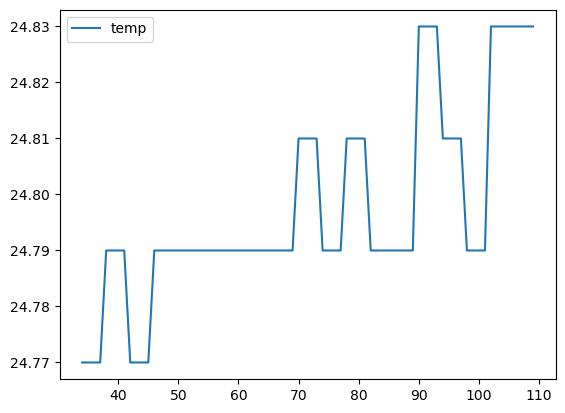

In [307]:
#get only samples from init to end tagged activity
formatted_data = data.iloc[lines_to_cut_init:lines_to_cut_end,:]
print(formatted_data.shape)
formatted_data.plot()
print(formatted_data)

(608, 1)


<Axes: >

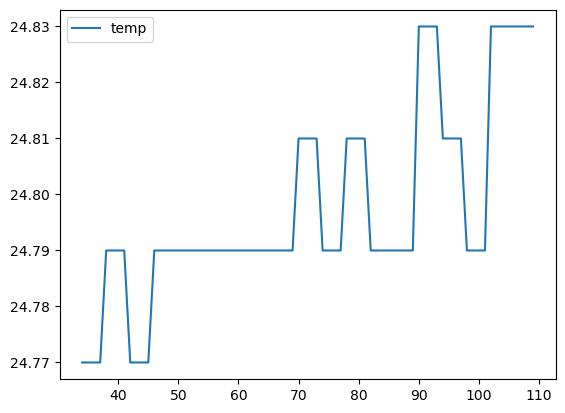

In [308]:
#upssampling from 4 to 32
formatted_data = formatted_data.loc[formatted_data.index.repeat(8)]
print(formatted_data.shape)
formatted_data.plot()

print(formatted_data.shape)

In [309]:
print(formatted_data)

      temp
34   24.77
34   24.77
34   24.77
34   24.77
34   24.77
..     ...
109  24.83
109  24.83
109  24.83
109  24.83
109  24.83

[608 rows x 1 columns]


In [310]:
dataLifeSenior = pd.read_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv',index_col=False)

diff_rows = formatted_data.shape[0]-dataLifeSenior.shape[0]
print('diff_rows ',diff_rows)
current=0
if(diff_rows > 0 and diff_rows < 33):
    while current < diff_rows:
        #remove last row
        formatted_data = formatted_data[:-1]
        current += 1
    dataLifeSenior["temp"] = formatted_data.values
    print(dataLifeSenior)
    #export the file to specific activity
    dataLifeSenior.to_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv', index=False)
else:
    print('There is a problem here')

diff_rows  10
        acc_x     acc_y     acc_z   bvp       eda    hr   temp
0   -0.312500 -0.906250  0.203125  0.12  0.398494  64.0  24.77
1   -0.296875 -0.937500  0.203125 -0.66  0.398494  64.0  24.77
2   -0.250000 -0.843750  0.234375 -1.88  0.398494  64.0  24.77
3   -0.234375 -0.890625  0.218750 -3.19  0.398494  64.0  24.77
4   -0.390625 -0.906250  0.265625 -4.45  0.398494  64.0  24.77
..        ...       ...       ...   ...       ...   ...    ...
593 -0.250000 -0.984375  0.265625 -0.94  0.388243  83.8  24.83
594 -0.343750 -0.875000  0.250000 -1.41  0.388243  83.8  24.83
595 -0.296875 -0.875000  0.359375 -1.37  0.388243  83.8  24.83
596 -0.343750 -0.906250  0.265625 -0.74  0.388243  83.8  24.83
597 -0.343750 -0.921875  0.250000 -0.38  0.388243  83.8  24.83

[598 rows x 7 columns]
